<a href="https://colab.research.google.com/github/Mo-NJ/Assign1---Supervised-Learning/blob/main/1_Original_Supervised_Learning_2024_05_08_Single_vs_Multiple_variable_MITHU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue> Goal
- Implement Linear Regression (Single variable). Example Study Hours, Score/Mark
-


# <font color=blue>Linear Regression

# Linear Regression
- Linear Regression is a supervised machine learning algorithm used for predicting continuous numeric values based on input features. It models the relationship between the input features and the target variable as a linear equation. The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the error between the predicted and actual target values.

- In simple linear regression, the relationship between a single input feature X and the target variable y is represented by the equation:

- y = mx + b

- where:

- y is the predicted target variable,
- m is the slope or coefficient of the linear model, representing the - - change in y for a unit change in X,
- x is the input feature (predictor variable),
- b is the y-intercept or bias term, representing the value of y when X is 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

## <font color=green>Single Variable

In [ ]:
# making data
study_time = [2,3,4,5,6,8,10]
marks = [60,70,80,85,80,90,95]

df = pd.DataFrame({"study_time":study_time,"marks":marks})


In [ ]:
df

,study_time,marks
0,2,60
1,3,70
2,4,80
3,5,85
4,6,80
5,8,90
6,10,95


<Axes: xlabel='study_time', ylabel='marks'>

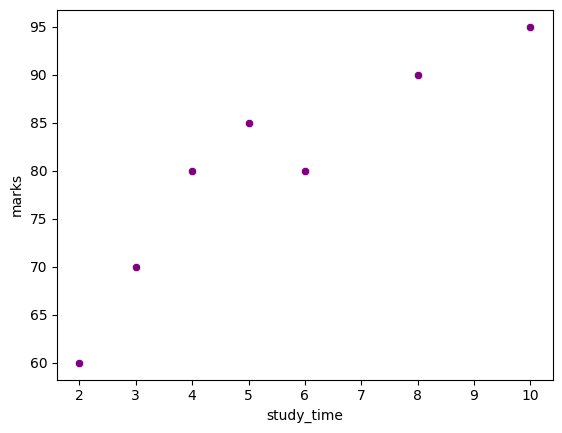

In [ ]:
# making a scatterplot
sns.scatterplot(x="study_time",y="marks",data=df,c="purple")


In [ ]:
# splitting data into features and target
X = df[["study_time"]]
y = df[["marks"]]

In [ ]:
# calling model
lr = LinearRegression()

# fitting on data
lr.fit(X,y)

# taking prediction on data
y_pred = lr.predict(X)

# **RESHAPE**
Why Reshape?
===========
- for ML model the target variable should be 2 dimensional.
- and for plotting the target variable or the prediction should be 1 dimension


In [ ]:
[1,2,3,4]

[1, 2, 3, 4]

In [ ]:
np.array([1,2,3,4]).ndim

1

In [ ]:
np.array([1,2,3,4]).reshape(-1,1)

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
np.array([1,2,3,4]).reshape(-1,1).ndim

2

In [ ]:
[[1],[2],[3]]

[[1], [2], [3]]

In [ ]:
np.array([[1],[2],[3]]).ndim

2

In [ ]:
# reshape data
# Why Reshape?
# ===========
# for ML model the target variable should be 2 dimensional.
# and for plotting the target variable or the prediction should be 1 dimension
y_pred_reshape=y_pred.reshape(-1)
X_reshape = X.values.reshape(-1)

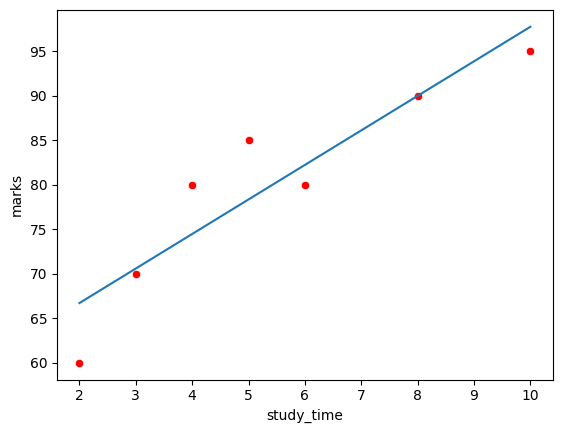

In [ ]:
# making the scatterplot with trend line
sns.scatterplot(x="study_time", y="marks", data=df, c= "red")
sns.lineplot(x=X_reshape, y=y_pred_reshape)
plt.show()

In [ ]:
# making prediciton using model
# passing the value for 5, and checking the prediction (came out around 78)
# When a student study 5 hours, the predicted score is around 78
lr.predict([[5]])

array([[78.33832335]])

In [ ]:
# INTERCEPT is what is the value of y when X is 0
# If the student is studying 0 hours, s/he will score 58.95 <which may not be realistic>
lr.intercept_

array([58.95209581])

In [ ]:
# slope. For 1 unit change in X, how much y increases
# getting SLOPE for feature
# note. if the student study 1 hour more, his/her score will increase up by 3.87 marks
lr.coef_

array([[3.87724551]])

# Assignment
- What is the predicted score if the study time is 6 hours?
- What does 'Intercept' *58.95 score* mean?
- Does in real world the score goes down below 58.95?
- Explain the slopes of all the feature variables, what is the relation of each variable with the target variable "Score"?

## <font color=green>Multiple Variable

In [ ]:
# making data
study_time = [2,3,4,5,6,8,10]
play_time = [3, 2.5, 2.1, 1.0, 3, 1.5, .5]
marks = [60,70,80,85,80,90,95]

df = pd.DataFrame({"study_time":study_time, "play_time":play_time, "marks":marks})

In [ ]:
df.head()

,study_time,play_time,marks
0,2,3.0,60
1,3,2.5,70
2,4,2.1,80
3,5,1.0,85
4,6,3.0,80


In [ ]:
df.shape

(7, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  7 non-null      int64  
 1   play_time   7 non-null      float64
 2   marks       7 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 296.0 bytes


In [ ]:
df.describe()

,study_time,play_time,marks
count,7.000000,7.000000,7.000000
mean,5.428571,1.942857,80.000000
std,2.819997,0.977850,11.902381
min,2.000000,0.500000,60.000000
25%,3.500000,1.250000,75.000000
50%,5.000000,2.100000,80.000000
75%,7.000000,2.750000,87.500000
max,10.000000,3.000000,95.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
study_time,7.0,5.428571,2.819997,2.0,3.50,5.0,7.00,10.0
play_time,7.0,1.942857,0.977850,0.5,1.25,2.1,2.75,3.0
marks,7.0,80.000000,11.902381,60.0,75.00,80.0,87.50,95.0


<Axes: xlabel='play_time', ylabel='marks'>

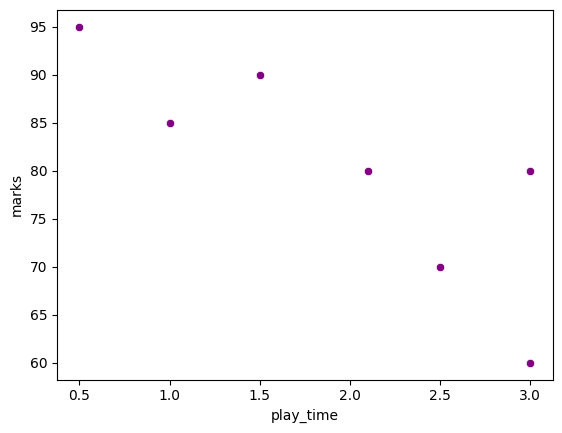

In [ ]:
# negative correlation between play time and marks
sns.scatterplot(x="play_time", y="marks", data=df, c="purple")

In [ ]:
# splitting data into feature & target
X = df[["study_time", "play_time"]]
y = df[["marks"]]

In [ ]:
X

,study_time,play_time
0,2,3.0
1,3,2.5
2,4,2.1
3,5,1.0
4,6,3.0
5,8,1.5
6,10,0.5


In [ ]:
y

,marks
0,60
1,70
2,80
3,85
4,80
5,90
6,95


In [ ]:
# lr model
lr = LinearRegression()

# fitting data
lr.fit(X,y)

# get prediction
y_pred = lr.predict(X)

In [ ]:
# intercept
lr.intercept_

array([72.4275949])

In [ ]:
# slope
# for 1 hour of study change, the mark will change 2.85
# for 1 hour of play time, the mark will change 4.08
lr.coef_

array([[ 2.85637437, -4.08348457]])

In [ ]:
# studying 5 hrs and playing 1.75hrs
lr.predict([[5, 1.75]])

array([[79.56336873]])

In [ ]:
# studying 5 hrs and playing 3hrs
lr.predict([[5, 3]])

array([[74.45901301]])

# Blog Link
- [linear_regression](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/)